<a href="https://colab.research.google.com/github/rsonar821/Classification-Capstone-Project/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future Coronary Heart Disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

Each attribute is a potential risk factor. There are demographic, behavioral and medical risk factors.

In [1]:
# Importing Basic Libraries

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the dataset

df = pd.read_csv("/content/drive/MyDrive/data_cardiovascular_risk.csv").drop('id', axis=1)

# **Data Understanding and Analysis**

In [4]:
# Printing the first 5 rows of the dataset

df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
# Printing the last 5 rows of the dataset

df.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [9]:
# Checking the shape of the dataset

df.shape

(3390, 16)

In [6]:
# Printing the names of the column of the dataset

df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

# **Data Description**
**Demographic:**
* **sex**: Male or Female("M" or "F")
* **age**: Age of the patient (Continuous: Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
* **education**: Education level of a person

**Behavioral:**
* **is_smoking**: Whether or not the patient is a current smoker ("YES" or "NO")
* **cigsPerDay**: The number of cigarettes that the person smoked on an average in one day.(Can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical (History):**
* **BPMeds**: Whether or not the patient was on blood pressure medication (Nominal)
* **prevalentStroke**: Whether or not the patient had previously had a stroke (Nominal)
* **prevalentHyp**: Whether or not the patient was hypertensive (Nominal)
* **diabetes**: Whether or not the patient had diabetes (Nominal)

**Medical (Current):**
* **totChol**: Total Cholesterol Level (Continuous)
* **sysBP**: Systolic Blood Pressure (Continuous)
* **diaBP**: Diastolic Blood Pressure (Continuous)
* **BMI**: Body Mass Index (Continuous)
* **heartRate**: Heart Rate (Continuous: In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* **glucose**: Glucose Level (Continuous)

**Predict Variable (Desired Target)**
* **TenYearCHD**: 10-year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [7]:
# Checking the basic information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [19]:
# Changing the datatype of the columns from float to int 

df['education'] = df['education'].astype(int)
df['BPMeds'] = df['BPMeds'].astype(int)

In [8]:
# Checking the total null values in each column

df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [10]:
# Examining the statistical description of the dataset

df.describe(include='all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


**Imputing Missing Values**

In [11]:
# Checking whether the peopple with null values of 'cigsPerDay' column smoking or not

df[df['cigsPerDay'].isnull()]['is_smoking']=='YES'

422     True
466     True
469     True
491     True
538     True
767     True
1461    True
1467    True
1597    True
1986    True
2031    True
2087    True
2240    True
2284    True
2527    True
2638    True
2648    True
2723    True
2879    True
2945    True
3301    True
3378    True
Name: is_smoking, dtype: bool

'cigsPerDay' column having NaN values show 'YES' for 'is_smoking', so the 'cigsPerDay' column NaN values can not be replaced with the median as it is 0, so replacing the NaN values with the mean 

In [13]:
# Imputing the null values with the mean of the column

df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].mean())

The mean and the median values of the rest columns is almost the same so imputing the null values of the these columns with the mean or median is ok

In [14]:
# Imputing the null values of all the other columns with the median of the column

df['education'] = df['education'].fillna(df['education'].median())
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].median())
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['glucose'] = df['glucose'].fillna(df['glucose'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

In [15]:
# Checking the null values in each column after imputing

df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [17]:
# Checking the basic information of the updated dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [18]:
# Checking the statistical description of the updated dataset 

df.describe(include='all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390,3390,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.971681,NaN,NaN,9.069477,0.029499,0.006490,0.315339,0.025664,237.039823,132.60118,82.883038,25.793251,75.976991,81.720059,0.150737
std,8.592878,1.005925,NaN,NaN,11.840458,0.169224,0.080309,0.464719,0.158153,44.994205,22.29203,12.023581,4.107026,11.970114,23.161265,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000


**Continuous Variables:**

* age
* cigsPerDay
* totChol
* sysBP
* diaBP
* BMI
* heartRate
* glucose

**Categorical Vaiables:**
* sex
* education
* is_smoking
* BPMeds
* prevalentStroke
* prevalentHyp
* diabetes
* TenYearCHD (Target Variable)





In [23]:
# Checking the unique values of each column

columns = df.columns
for column in columns:
  print(column, '\n')
  print(df[column].unique())
  print("---"*50, '\n')

age 

[64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
------------------------------------------------------------------------------------------------------------------------------------------------------ 

education 

[2 4 1 3]
------------------------------------------------------------------------------------------------------------------------------------------------------ 

sex 

['F' 'M']
------------------------------------------------------------------------------------------------------------------------------------------------------ 

is_smoking 

['YES' 'NO']
------------------------------------------------------------------------------------------------------------------------------------------------------ 

cigsPerDay 

[ 3.          0.         10.         20.         30.         35.
 40.         15.          9.         60.         17.         25.
  5.         43.          7.         50.         19.   

In [24]:
# Creating 2 lists of continuous and categorical variables

continuous_variables = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
categorical_variables = ['sex', 'education', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

In [25]:
# Checking the percentage of the data of various categories of the categorical variables 

for variables in categorical_variables:
  print(variables)
  print(df[variables].value_counts(normalize=True)*100)
  print('---'*50, '\n')

sex
F    56.725664
M    43.274336
Name: sex, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------ 

education
1    41.032448
2    31.769912
3    16.194690
4    11.002950
Name: education, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------ 

is_smoking
NO     50.235988
YES    49.764012
Name: is_smoking, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------ 

BPMeds
0    97.050147
1     2.949853
Name: BPMeds, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------ 

prevalentStroke
0    99.351032
1     0.648968
Name: prevalentStroke, dtype: float6

### **Univariate Analysis**

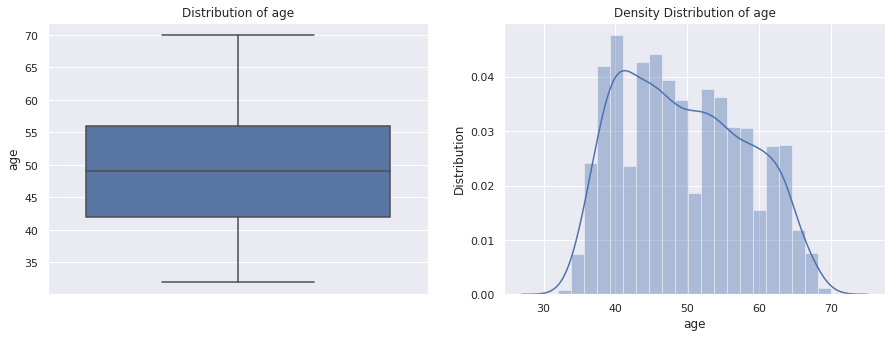

------------------------------------------------------------------------------------------------------------------------------------------------------


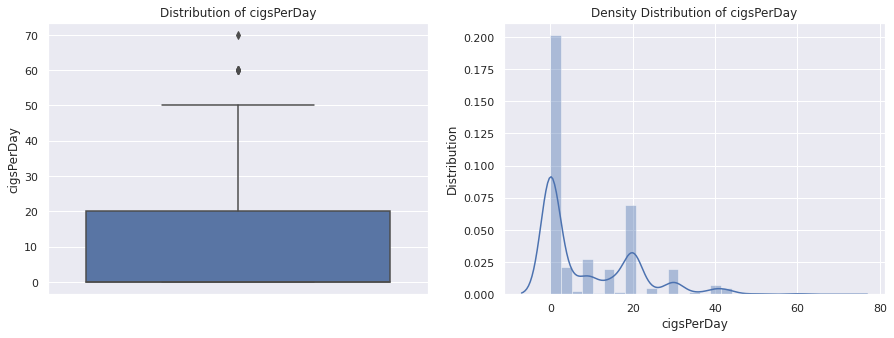

------------------------------------------------------------------------------------------------------------------------------------------------------


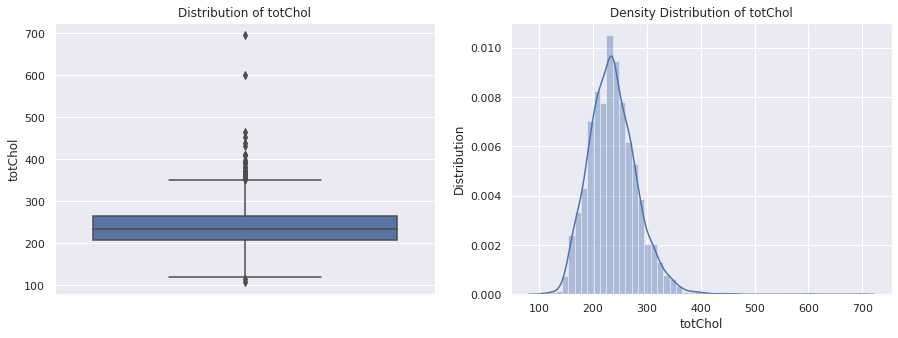

------------------------------------------------------------------------------------------------------------------------------------------------------


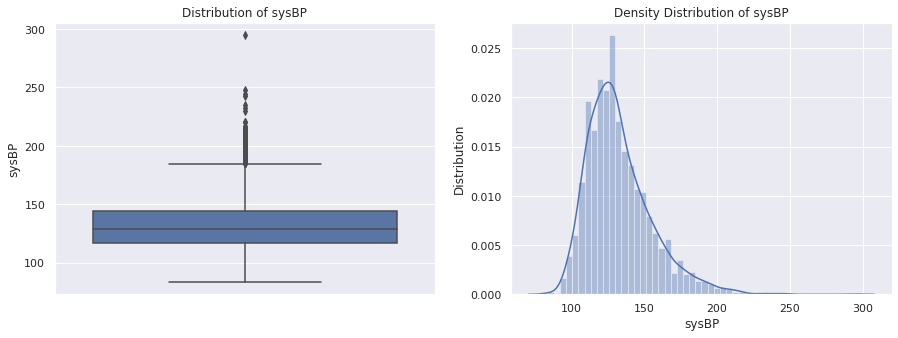

------------------------------------------------------------------------------------------------------------------------------------------------------


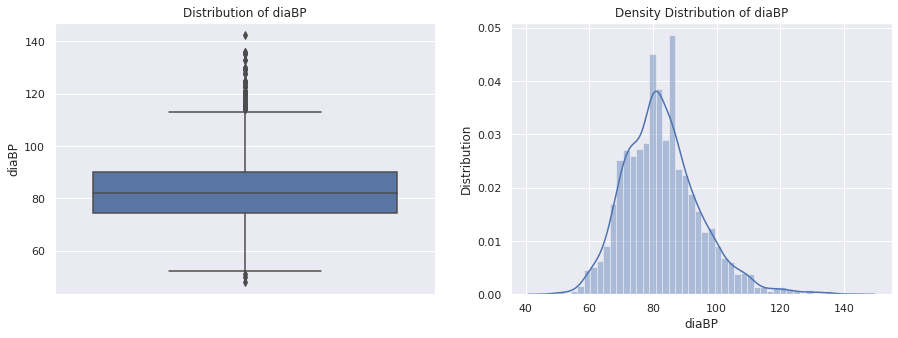

------------------------------------------------------------------------------------------------------------------------------------------------------


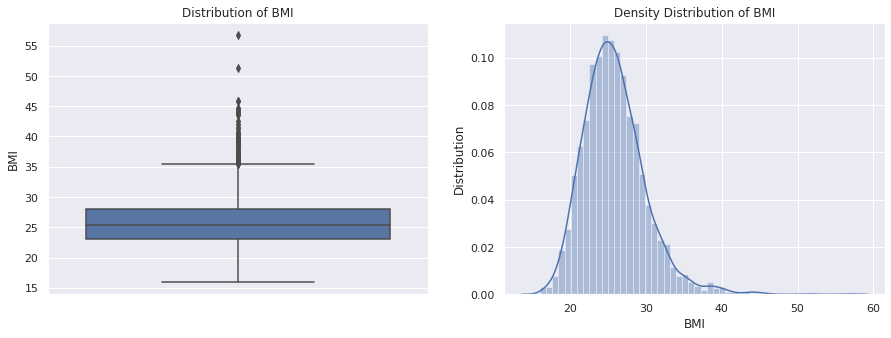

------------------------------------------------------------------------------------------------------------------------------------------------------


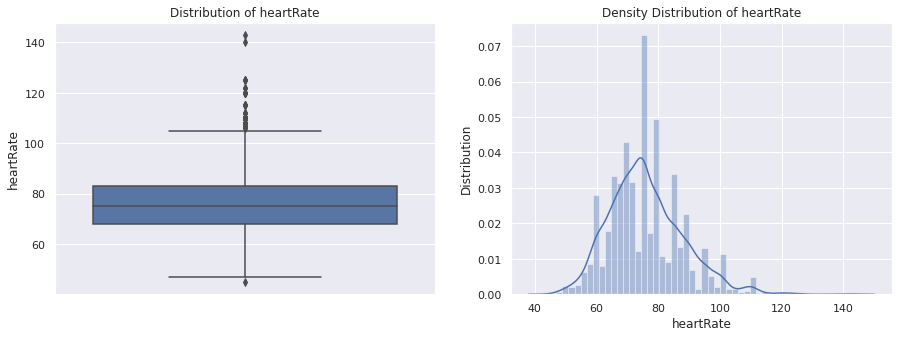

------------------------------------------------------------------------------------------------------------------------------------------------------


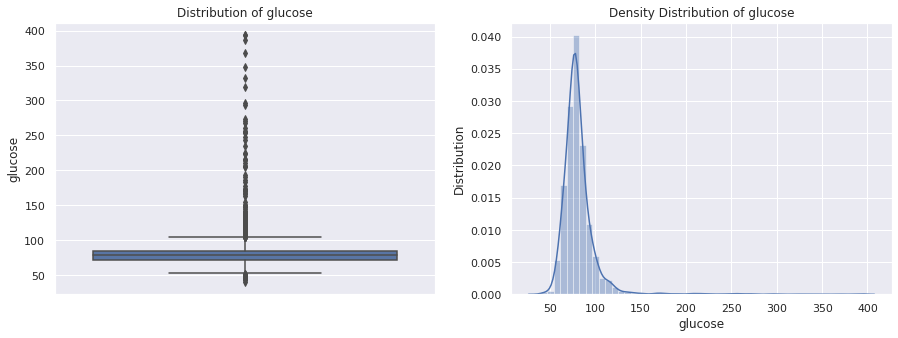

------------------------------------------------------------------------------------------------------------------------------------------------------


In [27]:
# Plotting the boxplot and density distribution of the continuous variables

for variables in continuous_variables:
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    figure = sns.boxplot(y = df[variables])
    figure.set(title = f'Distribution of {variables}')
    figure.set(ylabel= variables)
    
    plt.subplot(1, 2, 2)
    figure = sns.distplot(df[variables])
    figure.set(title = f'Density Distribution of {variables}')
    figure.set(xlabel=variables, ylabel= 'Distribution')

    plt.show()
    print('---'*50)

### **Bivariate Analysis**

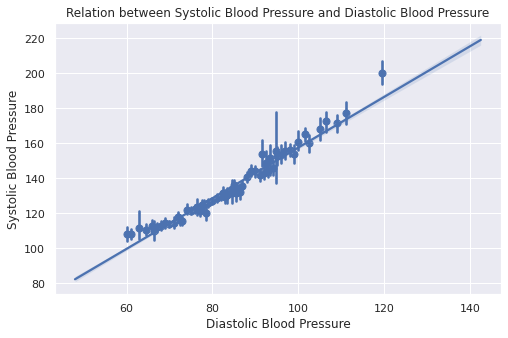

In [28]:
# Plotting a regression plot between sysBP and diaBP

plt.figure(figsize=(8,5))
figure = sns.regplot(x=df['diaBP'], y=df['sysBP'], x_bins=100, fit_reg=True)
figure.set(title='Relation between Systolic Blood Pressure and Diastolic Blood Pressure')
figure.set(xlabel='Diastolic Blood Pressure', ylabel='Systolic Blood Pressure')
plt.show(figure)

systolic Blood Pressure and diastolic Blood Pressure always show a linear relationship, so anyone out of the 2 can be neglected for the analysis as it would show the same relation with the other variables 

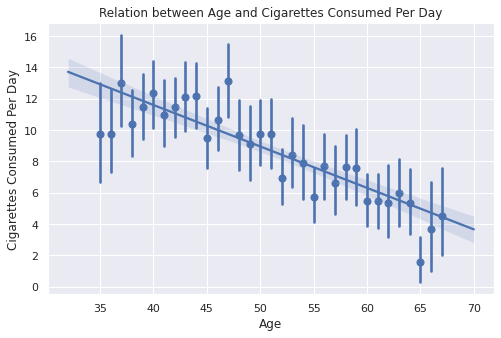

In [29]:
# Plotting a regression plot between age and cigsPerDay

plt.figure(figsize=(8,5))
figure = sns.regplot(x=df['age'], y=df['cigsPerDay'], x_bins=100, fit_reg=True)
figure.set(title='Relation between Age and Cigarettes Consumed Per Day')
figure.set(xlabel='Age', ylabel='Cigarettes Consumed Per Day')
plt.show(figure)

The numbers of cigarettes consumed per day decreases as the age increases

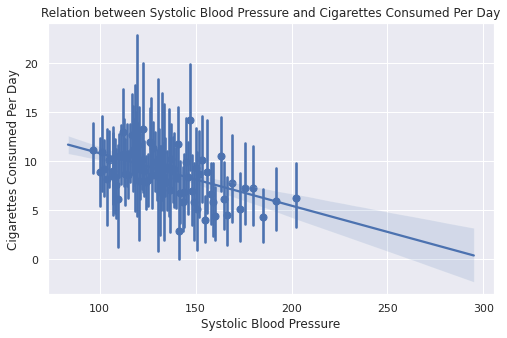

In [30]:
# Plotting a regression plot between sysBP and cigsPerDay

plt.figure(figsize=(8,5))
figure = sns.regplot(x=df['sysBP'], y=df['cigsPerDay'], x_bins=100, fit_reg=True)
figure.set(title='Relation between Systolic Blood Pressure and Cigarettes Consumed Per Day')
figure.set(xlabel='Systolic Blood Pressure', ylabel='Cigarettes Consumed Per Day')
plt.show(figure)

Systolic Blood Pressure decreases as the cigarettes consumed per day increases

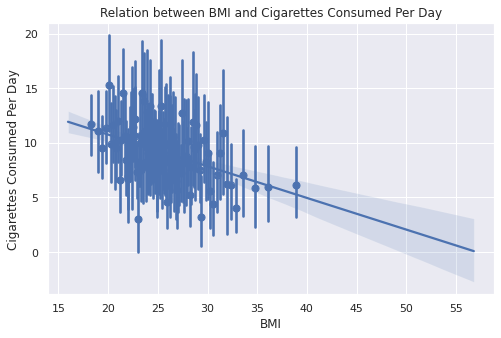

In [31]:
# Plotting a regression plot between BMI and cigsPerDay

plt.figure(figsize=(8,5))
figure = sns.regplot(x=df['BMI'], y=df['cigsPerDay'], x_bins=100, fit_reg=True)
figure.set(title='Relation between BMI and Cigarettes Consumed Per Day')
figure.set(xlabel='BMI', ylabel='Cigarettes Consumed Per Day')
plt.show(figure)

BMI decreases as the cigarettes consumed per day increases

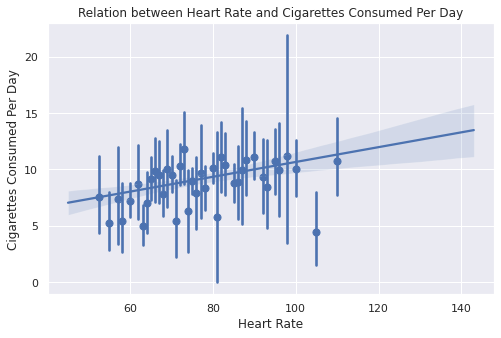

In [32]:
# Plotting a regression plot between heartRate and cigsPerDay

plt.figure(figsize=(8,5))
figure = sns.regplot(x=df['heartRate'], y=df['cigsPerDay'], x_bins=100, fit_reg=True)
figure.set(title='Relation between Heart Rate and Cigarettes Consumed Per Day')
figure.set(xlabel='Heart Rate', ylabel='Cigarettes Consumed Per Day')
plt.show(figure)

Heart Rate increases as the cigarettes consumed per day increases

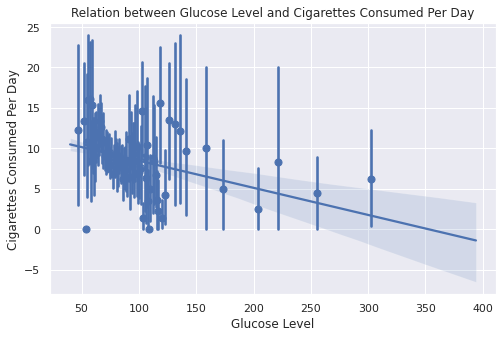

In [33]:
# Plotting a regression plot between glucose and cigsPerDay

plt.figure(figsize=(8,5))
figure = sns.regplot(x=df['glucose'], y=df['cigsPerDay'], x_bins=500, fit_reg=True)
figure.set(title='Relation between Glucose Level and Cigarettes Consumed Per Day')
figure.set(xlabel='Glucose Level', ylabel='Cigarettes Consumed Per Day')
plt.show(figure)

Not such a good relation but can be seen that glucose level decreases as the cigarettes consumed per day increases

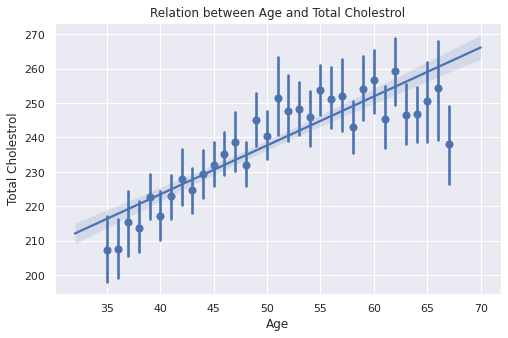

In [34]:
# Plotting a regression plot between age and totChol

plt.figure(figsize=(8,5))
figure = sns.regplot(x=df['age'], y=df['totChol'], x_bins=100, fit_reg=True)
figure.set(title='Relation between Age and Total Cholestrol')
figure.set(xlabel='Age', ylabel='Total Cholestrol')
plt.show(figure)

As the age increases the total cholestrol of the body also increases

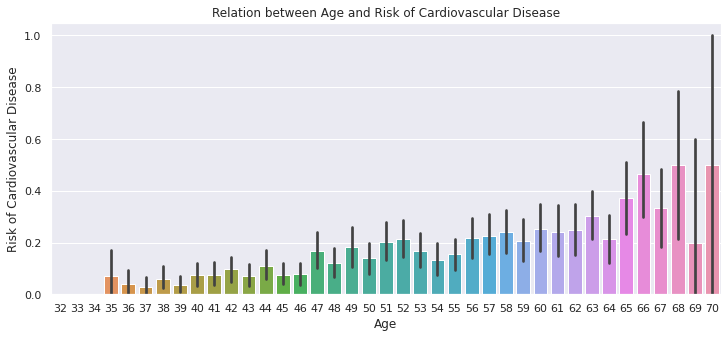

In [37]:
# Plotting a barplot between age and TenYearCHD

plt.figure(figsize=(12,5))
figure = sns.barplot(x=df['age'], y=df['TenYearCHD'])
figure.set(title='Relation between Age and Risk of Cardiovascular Disease')
figure.set(xlabel='Age', ylabel='Risk of Cardiovascular Disease')
plt.show(figure)

As the age increases the risk of getting a cardiovascular disease increases not such significantly but by a small ratio

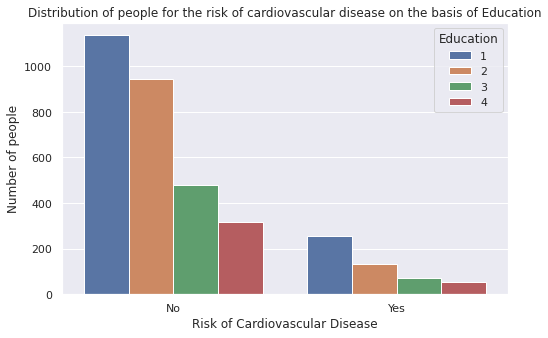

In [46]:
# Creating a dataframe for the value counts of 'education' on the basis of 'TenYearCHD'

education_df = pd.DataFrame(df.groupby('TenYearCHD')['education'].value_counts())
education_df.rename(columns={'education':'count'}, inplace=True)
education_df.reset_index(inplace=True)
education_df.sort_values(['TenYearCHD','education'], ascending=[True,True], inplace=True)


# Plotting a barplot of the people at the risk of cardiovascular disease on the basis of education

plt.figure(figsize=(8,5))
figure = sns.barplot(x='TenYearCHD', y='count', hue='education', data=education_df)
figure.set(title='Distribution of people for the risk of cardiovascular disease on the basis of Education')
figure.set(xlabel='Risk of Cardiovascular Disease', ylabel='Number of people')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Education')
plt.show(figure)

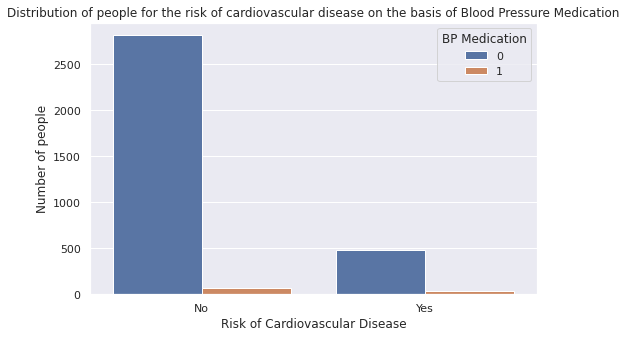

In [45]:
# Creating a dataframe for the value counts of 'BPMeds' on the basis of 'TenYearCHD'

bpmed_df = pd.DataFrame(df.groupby('TenYearCHD')['BPMeds'].value_counts())
bpmed_df.rename(columns={'BPMeds':'count'}, inplace=True)
bpmed_df.reset_index(inplace=True)
bpmed_df.sort_values(['TenYearCHD','BPMeds'], ascending=[True,True], inplace=True)

# Plotting a barplot of the people at the risk of cardiovascular disease on the basis of BPMeds

plt.figure(figsize=(8,5))
figure = sns.barplot(x='TenYearCHD', y='count', hue='BPMeds', data=bpmed_df)
figure.set(title='Distribution of people for the risk of cardiovascular disease on the basis of Blood Pressure Medication')
figure.set(xlabel='Risk of Cardiovascular Disease', ylabel='Number of people')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='BP Medication')
plt.show(figure)

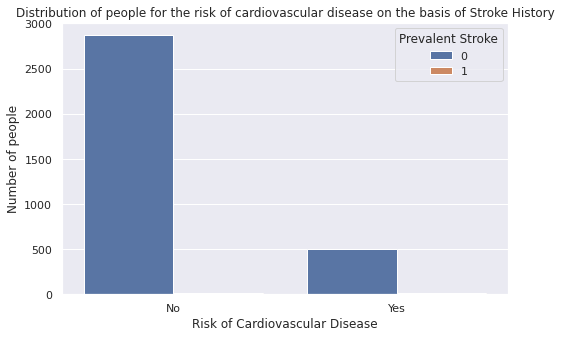

In [47]:
# Creating a dataframe for the value counts of 'prevalentStroke' on the basis of 'TenYearCHD'

prevalent_stroke_df = pd.DataFrame(df.groupby('TenYearCHD')['prevalentStroke'].value_counts())
prevalent_stroke_df.rename(columns={'prevalentStroke':'count'}, inplace=True)
prevalent_stroke_df.reset_index(inplace=True)
prevalent_stroke_df.sort_values(['TenYearCHD','prevalentStroke'], ascending=[True,True], inplace=True)

# Plotting a barplot of the people at the risk of cardiovascular disease on the basis of prevalentStroke

plt.figure(figsize=(8,5))
figure = sns.barplot(x='TenYearCHD', y='count', hue='prevalentStroke', data=prevalent_stroke_df)
figure.set(title='Distribution of people for the risk of cardiovascular disease on the basis of Stroke History')
figure.set(xlabel='Risk of Cardiovascular Disease', ylabel='Number of people')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Prevalent Stroke')
plt.show(figure)

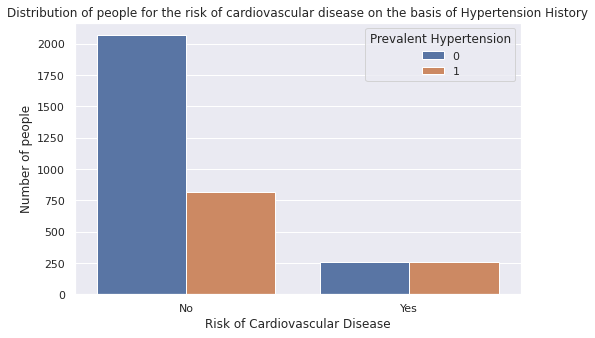

In [48]:
# Creating a dataframe for the value counts of 'prevalentHyp' on the basis of 'TenYearCHD'

prevalent_hyp_df = pd.DataFrame(df.groupby('TenYearCHD')['prevalentHyp'].value_counts())
prevalent_hyp_df.rename(columns={'prevalentHyp':'count'}, inplace=True)
prevalent_hyp_df.reset_index(inplace=True)
prevalent_hyp_df.sort_values(['TenYearCHD','prevalentHyp'], ascending=[True,True], inplace=True)

# Plotting a barplot of the people at the risk of cardiovascular disease on the basis of prevalentHyp

plt.figure(figsize=(8,5))
figure = sns.barplot(x='TenYearCHD', y='count', hue='prevalentHyp', data=prevalent_hyp_df)
figure.set(title='Distribution of people for the risk of cardiovascular disease on the basis of Hypertension History')
figure.set(xlabel='Risk of Cardiovascular Disease', ylabel='Number of people')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Prevalent Hypertension')
plt.show(figure)

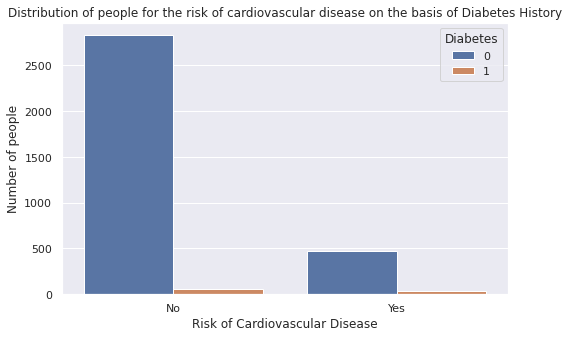

In [49]:
# Creating a dataframe for the value counts of 'diabetes' on the basis of 'TenYearCHD'

diabetes_df = pd.DataFrame(df.groupby('TenYearCHD')['diabetes'].value_counts())
diabetes_df.rename(columns={'diabetes':'count'}, inplace=True)
diabetes_df.reset_index(inplace=True)
diabetes_df.sort_values(['TenYearCHD','diabetes'], ascending=[True,True], inplace=True)

# Plotting a barplot of the people at the risk of cardiovascular disease on the basis of diabetes

plt.figure(figsize=(8,5))
figure = sns.barplot(x='TenYearCHD', y='count', hue='diabetes', data=diabetes_df)
figure.set(title='Distribution of people for the risk of cardiovascular disease on the basis of Diabetes History')
figure.set(xlabel='Risk of Cardiovascular Disease', ylabel='Number of people')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Diabetes')
plt.show(figure)

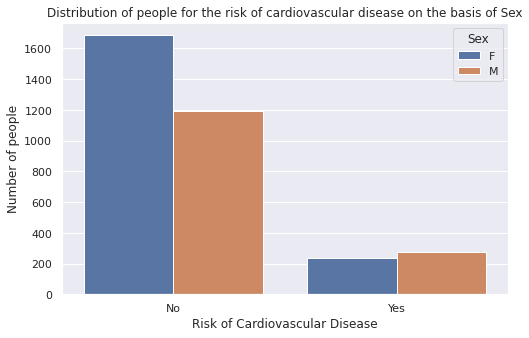

In [50]:
# Creating a dataframe for the value counts of 'sex' on the basis of 'TenYearCHD'

sex_df = pd.DataFrame(df.groupby('TenYearCHD')['sex'].value_counts())
sex_df.rename(columns={'sex':'count'}, inplace=True)
sex_df.reset_index(inplace=True)
sex_df.sort_values(['TenYearCHD','sex'], ascending=[True,True], inplace=True)

# Plotting a barplot of the people at the risk of cardiovascular disease on the basis of sex

plt.figure(figsize=(8,5))
figure = sns.barplot(x='TenYearCHD', y='count', hue='sex', data=sex_df)
figure.set(title='Distribution of people for the risk of cardiovascular disease on the basis of Sex')
figure.set(xlabel='Risk of Cardiovascular Disease', ylabel='Number of people')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Sex')
plt.show(figure)

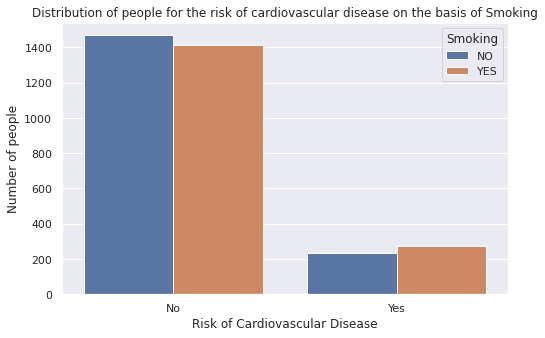

In [51]:
# Creating a dataframe for the value counts of 'is_smoking' on the basis of 'TenYearCHD'

is_smoking_df = pd.DataFrame(df.groupby('TenYearCHD')['is_smoking'].value_counts())
is_smoking_df.rename(columns={'is_smoking':'count'}, inplace=True)
is_smoking_df.reset_index(inplace=True)
is_smoking_df.sort_values(['TenYearCHD','is_smoking'], ascending=[True,True], inplace=True)

# Plotting a barplot of the people at the risk of cardiovascular disease on the basis of smoking

plt.figure(figsize=(8,5))
figure = sns.barplot(x='TenYearCHD', y='count', hue='is_smoking', data=is_smoking_df)
figure.set(title='Distribution of people for the risk of cardiovascular disease on the basis of Smoking')
figure.set(xlabel='Risk of Cardiovascular Disease', ylabel='Number of people')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Smoking')
plt.show(figure)

### **Multivariate Analysis**

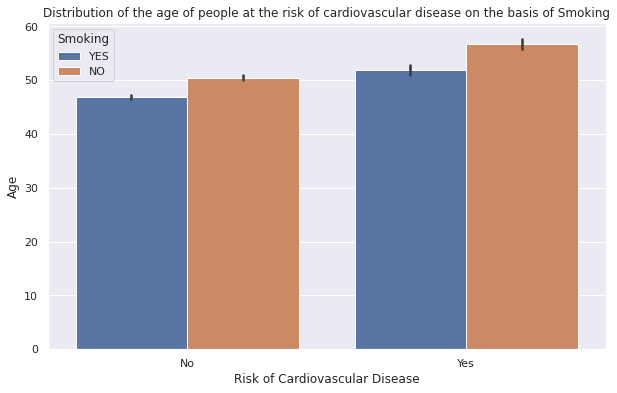

In [53]:
# Plotting a barplot of the age of the people at the risk of cardiovascular disease on the basis of smoking

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['age'], hue=df['is_smoking'])
figure.set(title='Distribution of the age of people at the risk of cardiovascular disease on the basis of Smoking')
figure.set(xlabel='Risk of Cardiovascular Disease', ylabel='Age')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Smoking')
plt.show(figure)

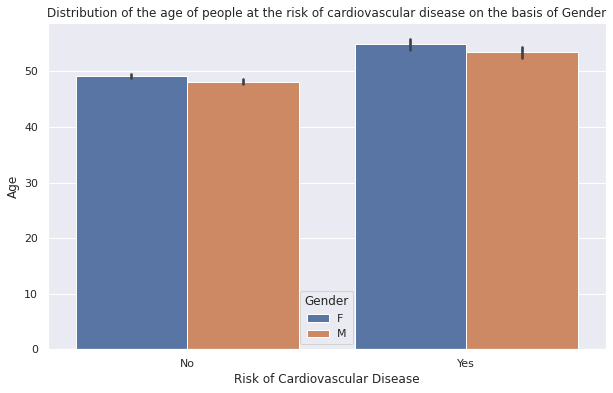

In [54]:
# Plotting a barplot of the age of the people at the risk of cardiovascular disease on the basis of gender

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['age'], hue=df['sex'])
figure.set(title='Distribution of the age of people at the risk of cardiovascular disease on the basis of Gender')
figure.set(xlabel='Risk of Cardiovascular Disease', ylabel='Age')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Gender')
plt.show(figure)

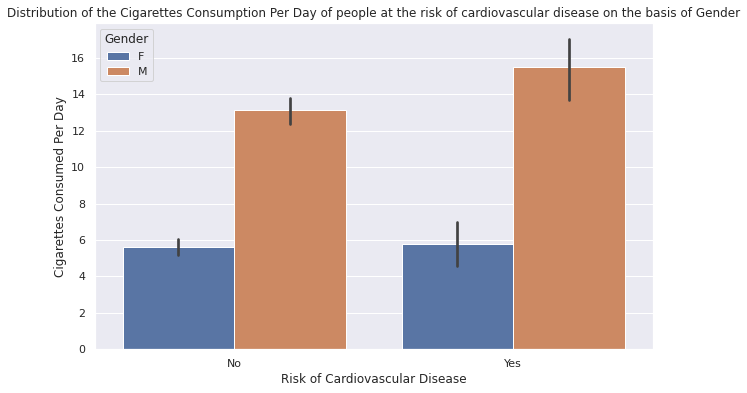

In [57]:
# Plotting a barplot of the 'cigsPerDay' of the people at the risk of cardiovascular disease on the basis of gender

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['cigsPerDay'], hue=df['sex'])
figure.set(title='Distribution of the Cigarettes Consumption Per Day of people at the risk of cardiovascular disease on the basis of Gender')
figure.set(xlabel='Risk of Cardiovascular Disease', ylabel='Cigarettes Consumed Per Day')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Gender')
plt.show(figure)

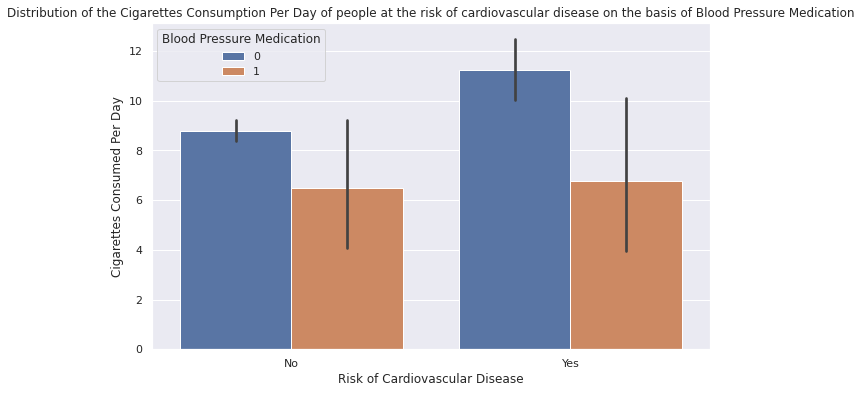

In [58]:
# Plotting a barplot of the 'cigsPerDay' of the people at the risk of cardiovascular disease on the basis of BPMeds 

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['cigsPerDay'], hue=df['BPMeds'])
figure.set(title='Distribution of the Cigarettes Consumption Per Day of people at the risk of cardiovascular disease on the basis of Blood Pressure Medication')
figure.set(xlabel='Risk of Cardiovascular Disease', ylabel='Cigarettes Consumed Per Day')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Blood Pressure Medication')
plt.show(figure)

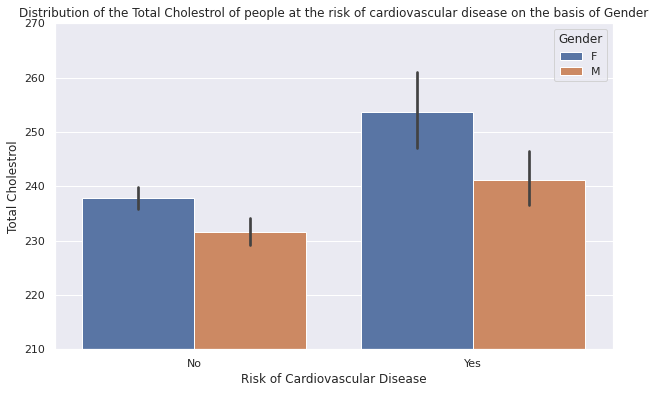

In [59]:
# Plotting a barplot of the 'totChol' of the people at the risk of cardiovascular disease on the basis of gender

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['totChol'], hue=df['sex'])
figure.set(title='Distribution of the Total Cholestrol of people at the risk of cardiovascular disease on the basis of Gender')
figure.set(xlabel='Risk of Cardiovascular Disease', ylabel='Total Cholestrol')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Gender')
plt.ylim(210, 270)
plt.show(figure)

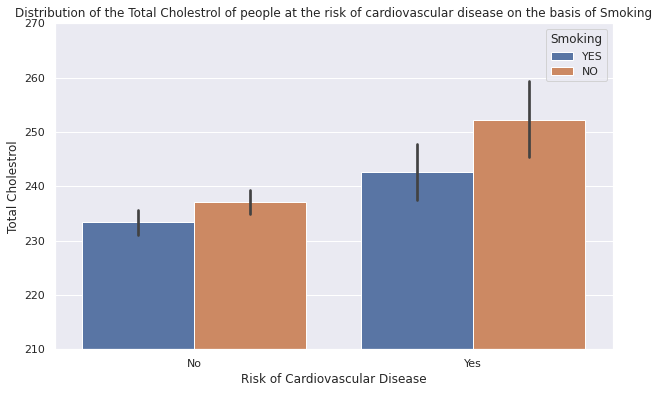

In [60]:
# Plotting a barplot of the 'totChol' of the people at the risk of cardiovascular disease on the basis of smoking

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['totChol'], hue=df['is_smoking'])
figure.set(title='Distribution of the Total Cholestrol of people at the risk of cardiovascular disease on the basis of Smoking')
figure.set(xlabel='Risk of Cardiovascular Disease', ylabel='Total Cholestrol')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Smoking')
plt.ylim(210, 270)
plt.show(figure)

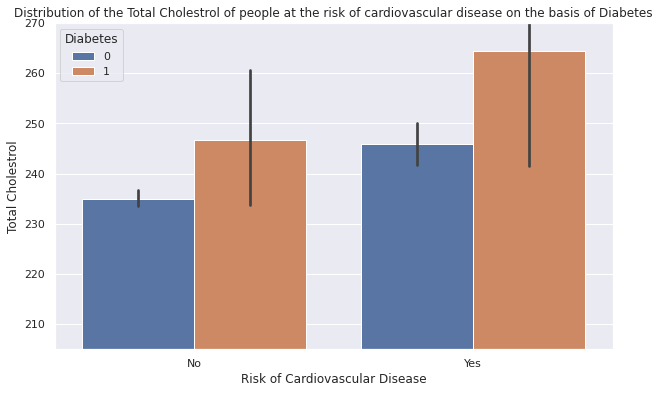

In [61]:
# Plotting a barplot of the 'totChol' of the people at the risk of cardiovascular disease on the basis of diabetes

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['totChol'], hue=df['diabetes'])
figure.set(title='Distribution of the Total Cholestrol of people at the risk of cardiovascular disease on the basis of Diabetes')
figure.set(xlabel='Risk of Cardiovascular Disease', ylabel='Total Cholestrol')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Diabetes')
plt.ylim(205, 270)
plt.show(figure)

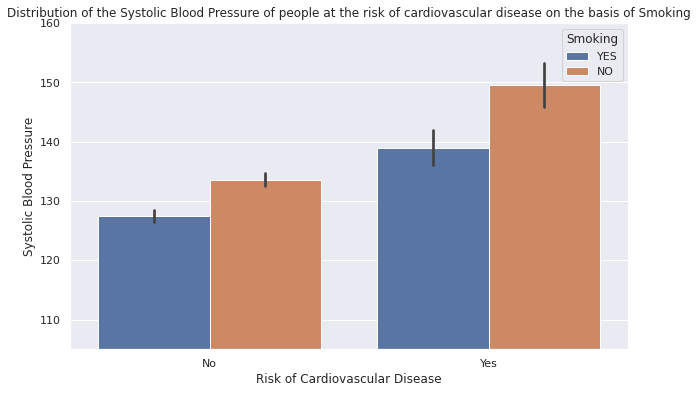

In [62]:
# Plotting a barplot of the 'sysBP' of the people at the risk of cardiovascular disease on the basis of smoking

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['sysBP'], hue=df['is_smoking'])
figure.set(title='Distribution of the Systolic Blood Pressure of people at the risk of cardiovascular disease on the basis of Smoking')
figure.set(xlabel='Risk of Cardiovascular Disease', ylabel='Systolic Blood Pressure')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Smoking')
plt.ylim(105, 160)
plt.show(figure)

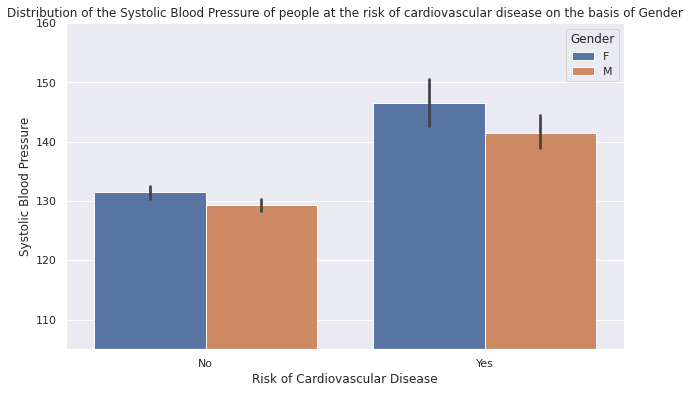

In [63]:
# Plotting a barplot of the 'sysBP' of the people at the risk of cardiovascular disease on the basis of gender

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['sysBP'], hue=df['sex'])
figure.set(title='Distribution of the Systolic Blood Pressure of people at the risk of cardiovascular disease on the basis of Gender')
figure.set(xlabel='Risk of Cardiovascular Disease', ylabel='Systolic Blood Pressure')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Gender')
plt.ylim(105, 160)
plt.show(figure)

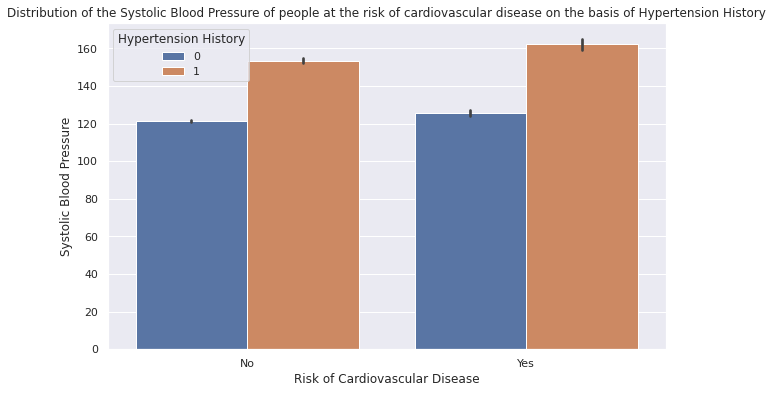

In [65]:
# Plotting a barplot of the 'sysBP' of the people at the risk of cardiovascular disease on the basis of Prevalent Hypertension

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['sysBP'], hue=df['prevalentHyp'])
figure.set(title='Distribution of the Systolic Blood Pressure of people at the risk of cardiovascular disease on the basis of Hypertension History')
figure.set(xlabel='Risk of Cardiovascular Disease', ylabel='Systolic Blood Pressure')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Hypertension History')
plt.show(figure)

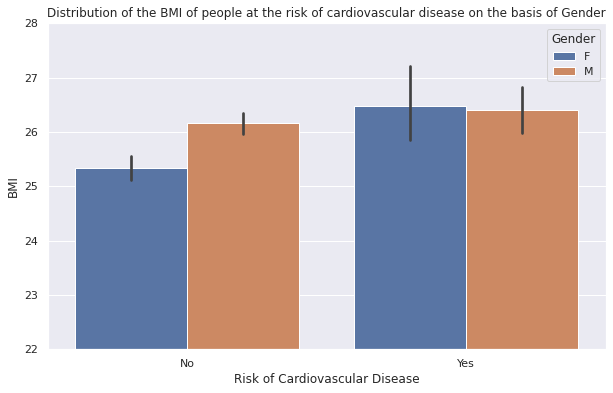

In [66]:
# Plotting a barplot of the 'BMI' of the people at the risk of cardiovascular disease on the basis of gender

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['BMI'], hue=df['sex'])
figure.set(title='Distribution of the BMI of people at the risk of cardiovascular disease on the basis of Gender')
figure.set(xlabel='Risk of Cardiovascular Disease', ylabel='BMI')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Gender')
plt.ylim(22, 28)
plt.show(figure)

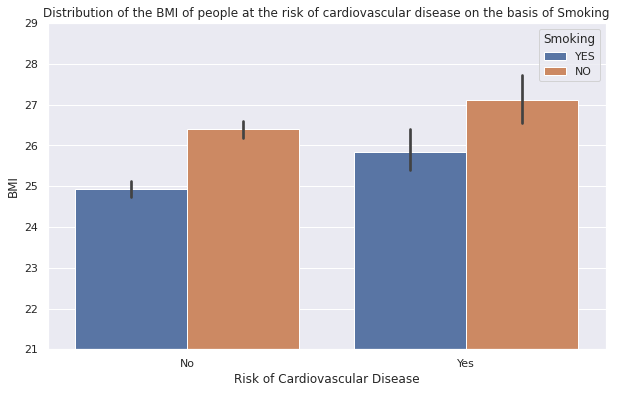

In [67]:
# Plotting a barplot of the 'BMI' of the people at the risk of cardiovascular disease on the basis of smoking

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['BMI'], hue=df['is_smoking'])
figure.set(title='Distribution of the BMI of people at the risk of cardiovascular disease on the basis of Smoking')
figure.set(xlabel='Risk of Cardiovascular Disease', ylabel='BMI')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Smoking')
plt.ylim(21, 29)
plt.show(figure)

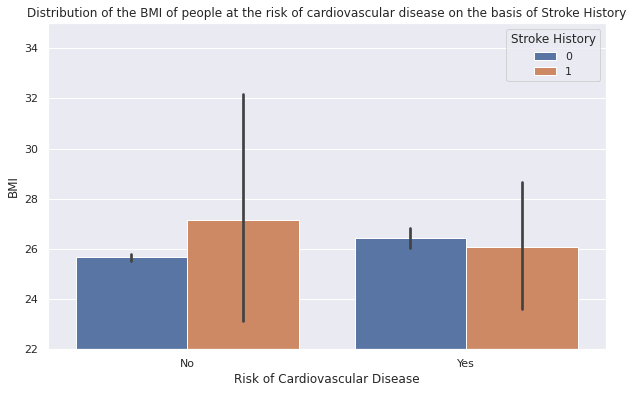

In [69]:
# Plotting a barplot of the 'BMI' of the people at the risk of cardiovascular disease on the basis of prevalent stroke

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['BMI'], hue=df['prevalentStroke'])
figure.set(title='Distribution of the BMI of people at the risk of cardiovascular disease on the basis of Stroke History')
figure.set(xlabel='Risk of Cardiovascular Disease', ylabel='BMI')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Stroke History')
plt.ylim(22, 35)
plt.show(figure)

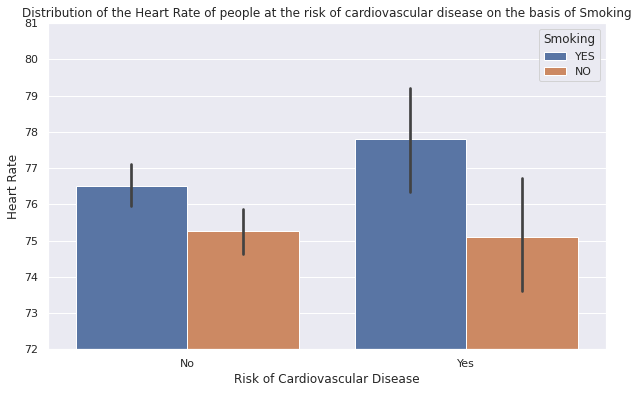

In [70]:
# Plotting a barplot of the 'heartRate' of the people at the risk of cardiovascular disease on the basis of smoking

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['heartRate'], hue=df['is_smoking'])
figure.set(title='Distribution of the Heart Rate of people at the risk of cardiovascular disease on the basis of Smoking')
figure.set(xlabel='Risk of Cardiovascular Disease', ylabel='Heart Rate')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Smoking')
plt.ylim(72, 81)
plt.show(figure)

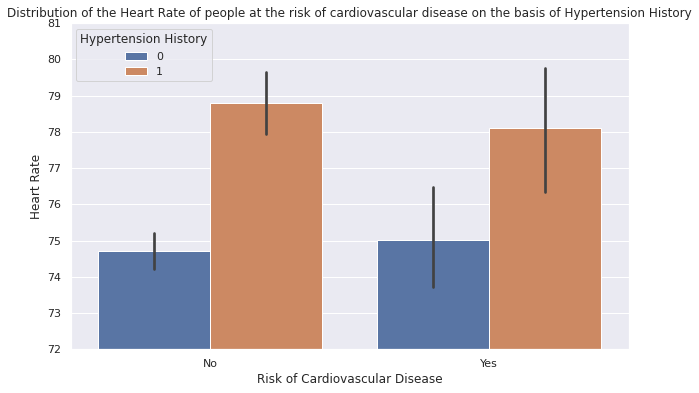

In [71]:
# Plotting a barplot of the 'heartRate' of the people at the risk of cardiovascular disease on the basis of prevalent hypertension

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['heartRate'], hue=df['prevalentHyp'])
figure.set(title='Distribution of the Heart Rate of people at the risk of cardiovascular disease on the basis of Hypertension History')
figure.set(xlabel='Risk of Cardiovascular Disease', ylabel='Heart Rate')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Hypertension History')
plt.ylim(72, 81)
plt.show(figure)

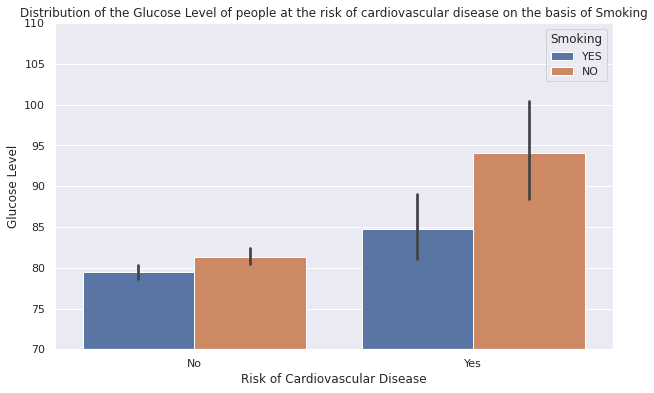

In [72]:
# Plotting a barplot of the 'glucose' of the people at the risk of cardiovascular disease on the basis of smoking

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['glucose'], hue=df['is_smoking'])
figure.set(title='Distribution of the Glucose Level of people at the risk of cardiovascular disease on the basis of Smoking')
figure.set(xlabel='Risk of Cardiovascular Disease', ylabel='Glucose Level')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Smoking')
plt.ylim(70, 110)
plt.show(figure)

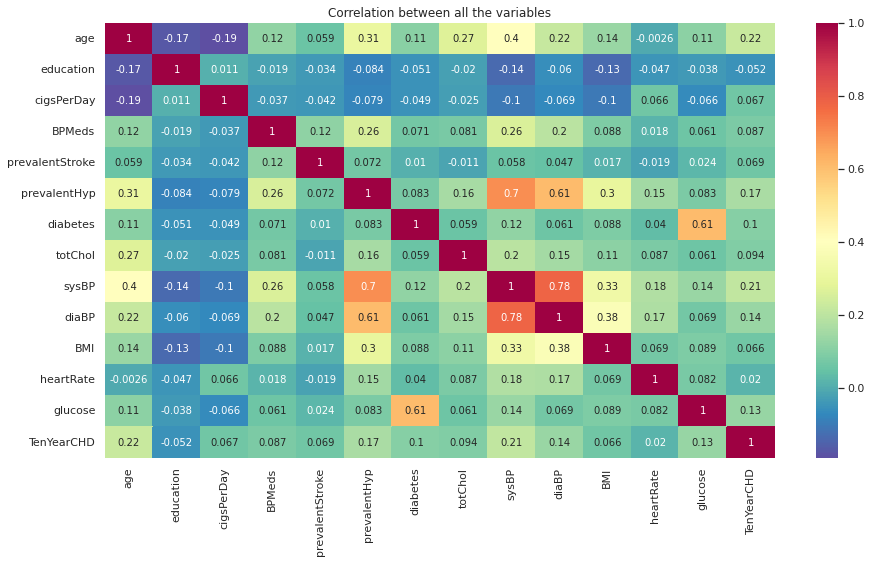

In [73]:
# Plotting a correlation matrix between all the variables to see the relation between each one of them

plt.figure(figsize=(15,8))
figure = sns.heatmap(df.corr(), annot=True, cmap='Spectral_r')
figure.set(title='Correlation between all the variables')
plt.show(figure)